# Belajar pandas

# #01: Menyertakan prefix dan suffix pada kolom data frame

In [2]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.3.3
1.21.2


In [3]:
# Persiapan data frame
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,10, size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,2,5,2,9,8
1,4,1,9,2,7
2,6,2,8,7,6
3,3,4,4,2,9
4,7,3,9,3,4


In [4]:
tuple('ABCDE')

('A', 'B', 'C', 'D', 'E')

In [5]:
# Menyertakan prefix kolom
df.add_prefix('kolom_')

,kolom_A,kolom_B,kolom_C,kolom_D,kolom_E
0,2,5,2,9,8
1,4,1,9,2,7
2,6,2,8,7,6
3,3,4,4,2,9
4,7,3,9,3,4


In [6]:
#Menyertakan sufix kolom
df.add_suffix('_field')

,A_field,B_field,C_field,D_field,E_field
0,2,5,2,9,8
1,4,1,9,2,7
2,6,2,8,7,6
3,3,4,4,2,9
4,7,3,9,3,4


# #02: Pemilihan baris (rows selection) pada data frame

In [7]:
# Persiapan data frame
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,5, size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,1,3,1,2,1
1,4,4,3,2,1
2,1,2,1,4,3
3,2,3,4,1,2
4,2,3,4,1,3
5,3,1,3,3,3
6,1,4,3,1,3
7,2,4,4,4,1
8,3,1,4,4,3
9,2,1,3,3,1


In [8]:
# Selection dengan operator logika | (or)
df[(df['A'] == 1) | (df['A'] == 3)]

,A,B,C,D,E
0,1,3,1,2,1
2,1,2,1,4,3
5,3,1,3,3,3
6,1,4,3,1,3
8,3,1,4,4,3


In [9]:
# Selection dengan fungsi isin()
df[df['A'].isin([1,3])]

,A,B,C,D,E
0,1,3,1,2,1
2,1,2,1,4,3
5,3,1,3,3,3
6,1,4,3,1,3
8,3,1,4,4,3


In [10]:
# Mengenal operator negasi ~
df[~df['A'].isin([1,3])]

,A,B,C,D,E
1,4,4,3,2,1
3,2,3,4,1,2
4,2,3,4,1,3
7,2,4,4,4,1
9,2,1,3,3,1


# #03: Konversi tipe data string ke numerik pada kolom data frame

In [11]:
# Persiapan data frame
data = {'col1':['1','2','3','teks'],
        'col2':['1','2','3','4']}

df=pd.DataFrame(data)
df

,col1,col2
0,1,1
1,2,2
2,3,3
3,teks,4


In [12]:
df.dtypes

col1    object
col2    object
dtype: object

In [13]:
# konversi tipe data dengan fungsi astype()
df_x = df.astype({'col2':'int64'})
df_x

,col1,col2
0,1,1
1,2,2
2,3,3
3,teks,4


In [14]:
df_x.dtypes

col1    object
col2     int64
dtype: object

In [15]:
# Konversi tipe data numerik dengan fungsi to_numeric()
df.apply(pd.to_numeric, errors ='coerce')

,col1,col2
0,1.0,1
1,2.0,2
2,3.0,3
3,NaN,4


# #04: Pemiliihan kolom (columns selection) pada pandas data frame berdasarkan tipe data

In [16]:
# Persiapan data frame
n_rows = 5
n_cols = 2
cols = ['bil_pecahan','bil_bulat']

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows, n_cols)), columns=cols)
df['bil_pecahan']=df['bil_pecahan'].astype('float')

df.index=pd.util.testing.makeDateIndex(n_rows, freq='H')
df=df.reset_index()

df['teks']=list('ABCDE')

df

C:\Users\yulio\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\__init__.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


,index,bil_pecahan,bil_bulat,teks
0,2000-01-01 00:00:00,3.0,12,A
1,2000-01-01 01:00:00,13.0,16,B
2,2000-01-01 02:00:00,14.0,5,C
3,2000-01-01 03:00:00,15.0,11,D
4,2000-01-01 04:00:00,16.0,12,E


In [17]:
df.dtypes

index          datetime64[ns]
bil_pecahan           float64
bil_bulat               int32
teks                   object
dtype: object

In [18]:
# memilih kolom bertipe data numerik
df.select_dtypes(include='number')

,bil_pecahan,bil_bulat
0,3.0,12
1,13.0,16
2,14.0,5
3,15.0,11
4,16.0,12


In [19]:
df.select_dtypes(include='float')

,bil_pecahan
0,3.0
1,13.0
2,14.0
3,15.0
4,16.0


In [20]:
df.select_dtypes(include='int')

,bil_bulat
0,12
1,16
2,5
3,11
4,12


In [21]:
# Memilih kolom bertipe data string atau object
df.select_dtypes(include='object')

,teks
0,A
1,B
2,C
3,D
4,E


In [22]:
# Memilih kolom bertipe data datetime
df.select_dtypes(include='datetime')

,index
0,2000-01-01 00:00:00
1,2000-01-01 01:00:00
2,2000-01-01 02:00:00
3,2000-01-01 03:00:00
4,2000-01-01 04:00:00


In [23]:
# Memiliih kolom dengan kombinasi tipe data
df.select_dtypes(include=['number','object'])

,bil_pecahan,bil_bulat,teks
0,3.0,12,A
1,13.0,16,B
2,14.0,5,C
3,15.0,11,D
4,16.0,12,E


# #05: Membalik urutan baris dan kolom pada data frame

In [24]:
# Persiapan data frame
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,10,size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,9,4,1,5,8
1,7,6,8,9,4
2,9,7,1,8,3
3,8,1,3,2,4
4,3,7,9,1,1


In [25]:
# Membalik urutan kolom
df.loc[:, ::-1]

,E,D,C,B,A
0,8,5,1,4,9
1,4,9,8,6,7
2,3,8,1,7,9
3,4,2,3,1,8
4,1,1,9,7,3


In [26]:
# Membalik urutan baris
df.loc[::-1]

,A,B,C,D,E
4,3,7,9,1,1
3,8,1,3,2,4
2,9,7,1,8,3
1,7,6,8,9,4
0,9,4,1,5,8


In [27]:
# Membalik urutan baris dan melakukan penyesuaian ulang index
df.loc[::-1].reset_index(drop=True)

,A,B,C,D,E
0,3,7,9,1,1
1,8,1,3,2,4
2,9,7,1,8,3
3,7,6,8,9,4
4,9,4,1,5,8


# #06: Mengganti nama (label) kolom pada data frame

In [28]:
# Persiapan data frame
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,10,size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,5,3,6,3,8
1,1,9,5,8,1
2,3,7,9,2,2
3,8,1,6,5,7
4,4,5,1,7,7


In [29]:
# Mengganti nama (label) untuk sebuah kolom pada data frame
df.rename(columns={'C' : 'Hobi'})

,A,B,Hobi,D,E
0,5,3,6,3,8
1,1,9,5,8,1
2,3,7,9,2,2
3,8,1,6,5,7
4,4,5,1,7,7


In [30]:
# Mengganti nama (label) untuk banyak kolom pada data frame
df.rename(columns={'A':'Nama', 'B':'Alamat', 'D':'Kota'})

,Nama,Alamat,C,Kota,E
0,5,3,6,3,8
1,1,9,5,8,1
2,3,7,9,2,2
3,8,1,6,5,7
4,4,5,1,7,7


# #07: Menghapus missing values pada data frame (NaN)

In [31]:
# Persiapan data frame
df = pd.util.testing.makeMissingDataframe().reset_index() #formula untuk bikin dummy data dengan missing values
df.head()

,index,A,B,C,D
0,MXGGU5yyEw,-0.648530,-0.734454,NaN,0.092825
1,ZBQBIBuaFn,2.025164,0.752690,-0.465499,-1.067093
2,K7FxneeDVw,-0.084460,0.155005,1.301179,0.396629
3,oPWCOySRoB,NaN,-1.694245,-0.077545,-0.016017
4,UVj57yzKOu,1.356388,0.407756,0.945975,NaN


In [32]:
df = df.rename(columns={'index' : 'Z'})
df.head()

,Z,A,B,C,D
0,MXGGU5yyEw,-0.648530,-0.734454,NaN,0.092825
1,ZBQBIBuaFn,2.025164,0.752690,-0.465499,-1.067093
2,K7FxneeDVw,-0.084460,0.155005,1.301179,0.396629
3,oPWCOySRoB,NaN,-1.694245,-0.077545,-0.016017
4,UVj57yzKOu,1.356388,0.407756,0.945975,NaN


In [33]:
df_backup = df.copy(deep=True)

In [34]:
# Menghapus (drop) setiap kolom yang mengandung missing values
df = df.dropna(axis='columns')
df.head()

,Z
0,MXGGU5yyEw
1,ZBQBIBuaFn
2,K7FxneeDVw
3,oPWCOySRoB
4,UVj57yzKOu


In [35]:
# Menghapus (drop) setiap baris yang mengandung missing values
df = df_backup.copy(deep=True)
df = df.dropna(axis='rows')
df.head()

,Z,A,B,C,D
1,ZBQBIBuaFn,2.025164,0.752690,-0.465499,-1.067093
2,K7FxneeDVw,-0.084460,0.155005,1.301179,0.396629
5,jr11TuD7kV,0.113118,-0.838190,0.659279,-0.497308
6,g89VPGXaFc,-1.322298,0.914774,1.461830,0.640695
7,apixNzNGve,0.233019,0.248527,-1.523734,-1.417598


In [36]:
# Persentase missing values untuk tiap kolom
df = df_backup.copy(deep=True)
df.isna().mean()

Z    0.000000
A    0.033333
B    0.066667
C    0.200000
D    0.100000
dtype: float64

In [37]:
# Menghapus (drop) setiap kolom yang mengandung missing values berdasarkan treshold / ambang batas (presentase missing value)
treshold = len(df)*0.9
df = df.dropna(thresh=treshold, axis='columns')
df.head()

,Z,A,B,D
0,MXGGU5yyEw,-0.648530,-0.734454,0.092825
1,ZBQBIBuaFn,2.025164,0.752690,-1.067093
2,K7FxneeDVw,-0.084460,0.155005,0.396629
3,oPWCOySRoB,NaN,-1.694245,-0.016017
4,UVj57yzKOu,1.356388,0.407756,NaN


# #08: Memeriksa kesamaan antar kolom (series) pada data frame

In [38]:
# Persiapan data frame
data  = {'A':[15, 15, 18, np.nan, 12],'B':[15, 15, 18, np.nan, 12]}
df = pd.DataFrame(data)
df

,A,B
0,15.0,15.0
1,15.0,15.0
2,18.0,18.0
3,NaN,NaN
4,12.0,12.0


In [39]:
# Mengenal pandas series
# data frame merupakan kumpulan dari data series
df['A']

0    15.0
1    15.0
2    18.0
3     NaN
4    12.0
Name: A, dtype: float64

In [40]:
type(df['A'])

pandas.core.series.Series

In [41]:
type(df)

pandas.core.frame.DataFrame

In [42]:
# Memeriksa kesamaan dengan operator == (Tidak di rekomendasikan karena apabila dalam data teradap NaN maka akan tidak terbaca dengan baik)
df['A'] == df['B']

0     True
1     True
2     True
3    False
4     True
dtype: bool

In [43]:
# Memeriksa kesamaan dengan method equals() | Lebih di rekomendasikan
df['A'].equals(df['B'])

True

In [44]:
# Memeriksa kesamaan antar dua data frame
df1 = df.copy(deep=True)
df.equals(df1)

True

In [45]:
df == df1

,A,B
0,True,True
1,True,True
2,True,True
3,False,False
4,True,True


# #09: Membagi data frame menjadi dua secara acak

In [46]:
# Persiapan data frame
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,16,3,1,3,10
1,6,16,9,13,2
2,17,11,19,5,15
3,3,16,1,14,1
4,5,4,15,7,8
5,14,7,7,18,7
6,2,5,3,4,6
7,19,11,8,14,14
8,17,5,5,5,3
9,12,4,6,11,18


In [47]:
# Membagi dua data frame menjadi dua secara acak berdasarkan proporsi tertentu
df.shape

(10, 5)

In [48]:
proporsi = 0.7
df_1 = df.sample(frac=proporsi)
df_2 = df.drop(df_1.index)

print(f'df_1 Shape: {df_1.shape}')
print(f'df_2 Shape: {df_2.shape}')

df_1 Shape: (7, 5)
df_2 Shape: (3, 5)


In [49]:
df_1

,A,B,C,D,E
2,17,11,19,5,15
3,3,16,1,14,1
0,16,3,1,3,10
6,2,5,3,4,6
1,6,16,9,13,2
4,5,4,15,7,8
5,14,7,7,18,7


In [50]:
df_2

,A,B,C,D,E
7,19,11,8,14,14
8,17,5,5,5,3
9,12,4,6,11,18


# #10: Mengganti nama (label) kolom pada data frame berdasarkan pola


In [51]:
# Persiapan data frame
df = pd.read_csv('./Dataset/titanicfull.csv')
df.columns = ['Pclass','Survival status','full Name','Sex ',' Age','Sib SP', 'parch','Ticket','Fare','Cabin','Embarked']
df_backup = df.copy(deep=True)
df.head()

,Pclass,Survival status,full Name,Sex,Age,Sib SP,parch,Ticket,Fare,Cabin,Embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [52]:
# Menggunakan lowercase untuk nama kolom dan mengganti spasi dengan _
df.columns = df.columns.str.replace(' ','_').str.lower()
df.head()

,pclass,survival_status,full_name,sex_,_age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [53]:
# Memangkas kelebihan spasi pada nama kolom
df = df_backup.copy(deep=True)
df.columns = df.columns.str.lower().str.strip().str.replace(' ','_') 
# Remark:
# str.lower() = merubah menjadi huruf kecil
# str.strip() = menghilangkan kelebihan sepasi di awal ataupun diakhir kata
# str.replace() = mengganti huruf
df.head()

,pclass,survival_status,full_name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


# #11: Seleksi kolom dan baris pada data frame menggunakan loc

In [54]:
# Persiapan data frame
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,1,2,1,12,3
1,1,16,14,12,5
2,1,16,11,8,9
3,4,1,17,9,11
4,15,12,13,8,19
5,11,8,13,9,7
6,4,10,17,7,14
7,9,1,17,13,9
8,8,12,9,15,14
9,8,5,13,16,13


In [55]:
# Seleksi kolom dan baris menggunakan loc
df.loc[[0,3,4],['B','E']] #bagian pertama untuk baris, bagian kedua untuk kolom


,B,E
0,2,3
3,1,11
4,12,19


In [56]:
# Seleksi baris dengan kondisi
df.loc[df['B']>10,['B','D','E']]

,B,D,E
1,16,12,5
2,16,8,9
4,12,8,19
8,12,15,14


In [57]:
# Slicing data frame dengan loc
df.loc[0:4, 'B':'D'] #slicing pada loc dataframe start dan End index sifatnya inclusif artinya angka tersebut di turut sertakan | Slicing list hanya start index say inclusive

,B,C,D
0,2,1,12
1,16,14,12
2,16,11,8
3,1,17,9
4,12,13,8


# #12: Membentuk kolom bertipe datetime dari beberapa kolom lain pada pandas data frame

In [58]:
# Persiapan data frame
data = {'day':[1,2,10,25,12], 'month':[1,2,4,5,6], 'year':[2000,2001,2010,2015,2020]} #data dictionary
df = pd.DataFrame(data)
df

,day,month,year
0,1,1,2000
1,2,2,2001
2,10,4,2010
3,25,5,2015
4,12,6,2020


In [59]:
# Membentuk kolom bertipe datetime
df['penanggalan'] = pd.to_datetime(df[['day','month','year']])
df

,day,month,year,penanggalan
0,1,1,2000,2000-01-01
1,2,2,2001,2001-02-02
2,10,4,2010,2010-04-10
3,25,5,2015,2015-05-25
4,12,6,2020,2020-06-12


In [60]:
df.dtypes

day                     int64
month                   int64
year                    int64
penanggalan    datetime64[ns]
dtype: object

# #13: Konversi nilai numerik ke dalam kategori pada data frame

In [61]:
# Persiapan data frame
n_rows = 10
n_cols = 1
cols = ('usia',)

df = pd.DataFrame(np.random.randint(1,99, size=(n_rows,n_cols)),columns=cols)
df

,usia
0,41
1,11
2,22
3,28
4,15
5,30
6,65
7,97
8,86
9,20


In [62]:
# Pengelompokan nilai numerik ke dalam beberapa kategori menggunakan cut()
df['kelompok_usia'] = pd.cut(df['usia'], bins=[0,18,65,99], labels=['anak','dewasa','manula'])
df

,usia,kelompok_usia
0,41,dewasa
1,11,anak
2,22,dewasa
3,28,dewasa
4,15,anak
5,30,dewasa
6,65,dewasa
7,97,manula
8,86,manula
9,20,dewasa


# #14: Menggabungkan (merge) dua pandas data frame

In [63]:
# Persiapan data frame
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows,n_cols)),columns=cols)
df.head()

,A,B,C,D,E
0,17,10,4,2,13
1,3,7,19,16,13
2,8,15,13,15,7
3,9,7,15,8,18
4,12,14,11,12,12


In [64]:
df1 = df.copy(deep=True)
df1 = df1.drop([1,4])
df1

,A,B,C,D,E
0,17,10,4,2,13
2,8,15,13,15,7
3,9,7,15,8,18


In [65]:
df2 = df.copy(deep=True)
df2 = df2.drop([0,3])
df2

,A,B,C,D,E
1,3,7,19,16,13
2,8,15,13,15,7
4,12,14,11,12,12


In [66]:
# MEnggabungkan dua data frame
df_inner = pd.merge(df1, df2, how='inner')
df_inner #Menghasilkan index baru

,A,B,C,D,E
0,8,15,13,15,7


In [67]:
df_outer = pd.merge(df1, df2, how='outer')
df_outer # nilai duplikasi akan di hilangkan, mostly used in actual case

,A,B,C,D,E
0,17,10,4,2,13
1,8,15,13,15,7
2,9,7,15,8,18
3,3,7,19,16,13
4,12,14,11,12,12


# #15: Memecah nilai string suatu kolom ke dalam beberapa kolom baru pada pandas data frame

In [68]:
# Persiapan data frame
data = {'nama':['Didi Kempot', 'Glen Fredly','Mbah Surip'], 'tempat_kelahiran':['Surakarta, jawa Tengah','Jakarta, DKI Jakarta','Mojokerto, Jawa Timur']}
df = pd.DataFrame(data)
df

,nama,tempat_kelahiran
0,Didi Kempot,"Surakarta, jawa Tengah"
1,Glen Fredly,"Jakarta, DKI Jakarta"
2,Mbah Surip,"Mojokerto, Jawa Timur"


In [69]:
# Memecah nama depan dan nama belakang
df[['nama_depan','nama_belakang']] = df['nama'].str.split(' ', expand=True)
df

,nama,tempat_kelahiran,nama_depan,nama_belakang
0,Didi Kempot,"Surakarta, jawa Tengah",Didi,Kempot
1,Glen Fredly,"Jakarta, DKI Jakarta",Glen,Fredly
2,Mbah Surip,"Mojokerto, Jawa Timur",Mbah,Surip


In [70]:
# Memecah nama kota dan propinsi
df[['kota','propinsi']] = df['tempat_kelahiran'].str.split(',', expand=True)
df

,nama,tempat_kelahiran,nama_depan,nama_belakang,kota,propinsi
0,Didi Kempot,"Surakarta, jawa Tengah",Didi,Kempot,Surakarta,jawa Tengah
1,Glen Fredly,"Jakarta, DKI Jakarta",Glen,Fredly,Jakarta,DKI Jakarta
2,Mbah Surip,"Mojokerto, Jawa Timur",Mbah,Surip,Mojokerto,Jawa Timur


# #16: Menata ulang data frame dengan multiple indexes menggunakan unstack()

In [71]:
# Persiapan data frame
df = pd.read_csv('./Dataset/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [72]:
# Data frame dengan multiple indexes dari hasil gouping
df.groupby(['sex','pclass'])['survived'].mean().to_frame() #to_frame() digunakan untuk mempercantik tampilan dalam hal ini tabel

survived
sex    pclass          
female 1       0.965278
       2       0.886792
       3       0.490741
male   1       0.340782
       2       0.146199
       3       0.152130

In [73]:
# Menata ulang data frame dengan multiple indexes
df.groupby(['sex','pclass'])['survived'].mean().unstack()

pclass,1,2,3
sex,,,
female,0.965278,0.886792,0.490741
male,0.340782,0.146199,0.152130


# #17: Resampling pada data deret waktu (time series data)

In [74]:
# Persiapan data frame
n_rows = 365*24 #365 = 365 hari atau 1 tahun | 24 = 24 jam atau 1 hari
n_cols = 2
cols = ['col1','col2']

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows,n_cols)), columns=cols)
df.index = pd.util.testing.makeDateIndex(n_rows, freq='H')  #deret waktu dalam jam
df

,col1,col2
2000-01-01 00:00:00,10,5
2000-01-01 01:00:00,13,16
2000-01-01 02:00:00,17,11
2000-01-01 03:00:00,13,3
2000-01-01 04:00:00,10,11
...,...,...
2000-12-30 19:00:00,18,5
2000-12-30 20:00:00,9,15
2000-12-30 21:00:00,11,1
2000-12-30 22:00:00,18,3


In [75]:
# Resampling data dengan interval monthly
df.resample('M')['col1'].sum().to_frame()

,col1
2000-01-31,7506
2000-02-29,6788
2000-03-31,7512
2000-04-30,7238
2000-05-31,7450
2000-06-30,7078
2000-07-31,7542
2000-08-31,7679
2000-09-30,7190
2000-10-31,7522


In [76]:
# Resampling data dengan interval daily
df.resample('D')['col1'].sum().to_frame()

,col1
2000-01-01,309
2000-01-02,224
2000-01-03,226
2000-01-04,265
2000-01-05,227
...,...
2000-12-26,237
2000-12-27,256
2000-12-28,248
2000-12-29,282


# #18: Membentuk dummy data frame

In [77]:
# Membentuk data frame dari dictionary
pd.DataFrame({'col1':[1,2,3,4],'col2':[5,6,7,8]})

,col1,col2
0,1,5
1,2,6
2,3,7
3,4,8


In [78]:
# Membentuk data frame dari numpy array
n_rows = 5
n_cols = 3

arr = np.random.randint(1,20,size=(n_rows,n_cols))
arr

array([[ 5, 10, 17],
       [14, 16,  4],
       [14,  4,  2],
       [10, 19, 12],
       [15, 13,  9]])

In [79]:
pd.DataFrame(arr,columns=tuple('ABC'))

,A,B,C
0,5,10,17
1,14,16,4
2,14,4,2
3,10,19,12
4,15,13,9


In [80]:
# Membentuk data frame dengan memanfaatkan pandas.util.testing
pd.util.testing.makeDataFrame().head()

,A,B,C,D
ZzIdco8x9e,-0.043269,-0.551741,0.671438,-0.371103
VN9XjmNn5b,1.296291,-0.310662,-0.409542,0.040533
6SShEn49Y1,-0.210281,-0.616282,-0.835468,0.682823
jfT1G2y7Nm,-0.067957,-0.491813,-1.171374,0.001985
2DWWcetwFp,0.758096,1.672950,-0.271302,-0.551823


In [81]:
pd.util.testing.makeMixedDataFrame().head()

,A,B,C,D
0,0.0,0.0,foo1,2009-01-01
1,1.0,1.0,foo2,2009-01-02
2,2.0,0.0,foo3,2009-01-05
3,3.0,1.0,foo4,2009-01-06
4,4.0,0.0,foo5,2009-01-07


In [82]:
pd.util.testing.makeTimeDataFrame().head()

,A,B,C,D
2000-01-03,0.503620,-1.363053,1.548856,0.566015
2000-01-04,-2.089079,1.326877,-0.194333,1.866309
2000-01-05,0.273949,-1.533342,0.011058,0.190276
2000-01-06,-0.548147,-0.901493,0.925697,-0.252652
2000-01-07,1.241710,0.298493,0.425878,-0.345339


In [83]:
pd.util.testing.makeMissingDataframe().head()

,A,B,C,D
1RmDq3YgU5,-0.398451,-1.265123,NaN,0.783927
zJo7VTvrMW,0.046551,-0.844906,NaN,-1.395079
gKJRnVCJzm,1.011319,-0.572145,0.699813,0.880185
JmacxUAyau,NaN,-1.122763,-1.061181,0.845977
OJMRNzy17b,1.132413,-1.232031,0.803317,NaN


# #19: Formating tampilan data frame

In [84]:
# Persiapan data frame
n_rows = 5
n_cols = 2
cols = ['omset','operational']

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows,n_cols)), columns=cols)
df

,omset,operational
0,12,2
1,2,16
2,12,6
3,7,13
4,13,2


In [85]:
df['omset'] = df['omset']*100_000
df['operational'] = df['operational']*10_000
df

,omset,operational
0,1200000,20000
1,200000,160000
2,1200000,60000
3,700000,130000
4,1300000,20000


In [86]:
df.index = pd.util.testing.makeDateIndex(n_rows, freq='D')
df = df.reset_index()
df = df.rename(columns={'index':'tanggal'})
df

,tanggal,omset,operational
0,2000-01-01,1200000,20000
1,2000-01-02,200000,160000
2,2000-01-03,1200000,60000
3,2000-01-04,700000,130000
4,2000-01-05,1300000,20000


In [87]:
# Melakukan formatting tampilan data frame
formatku = {'tanggal':'{:%d/%m/%y}','operational':'Rp. {:.2f}','omset':'Rp. {:.2f}'}
laporan = df.style.format(formatku)
laporan

,tanggal,omset,operational
0,01/01/00,Rp. 1200000.00,Rp. 20000.00
1,02/01/00,Rp. 200000.00,Rp. 160000.00
2,03/01/00,Rp. 1200000.00,Rp. 60000.00
3,04/01/00,Rp. 700000.00,Rp. 130000.00
4,05/01/00,Rp. 1300000.00,Rp. 20000.00


In [88]:
type(laporan) #type laporn bukan object dataframe tapi styler


pandas.io.formats.style.Styler

In [89]:
laporan.hide_index()

tanggal,omset,operational
01/01/00,Rp. 1200000.00,Rp. 20000.00
02/01/00,Rp. 200000.00,Rp. 160000.00
03/01/00,Rp. 1200000.00,Rp. 60000.00
04/01/00,Rp. 700000.00,Rp. 130000.00
05/01/00,Rp. 1300000.00,Rp. 20000.00


In [90]:
laporan.set_caption('Data omset dan operational')

tanggal,omset,operational
01/01/00,Rp. 1200000.00,Rp. 20000.00
02/01/00,Rp. 200000.00,Rp. 160000.00
03/01/00,Rp. 1200000.00,Rp. 60000.00
04/01/00,Rp. 700000.00,Rp. 130000.00
05/01/00,Rp. 1300000.00,Rp. 20000.00


In [91]:
laporan.highlight_min('omset', color='pink')
laporan.highlight_max('omset', color='lightgreen')

laporan.highlight_min('operational', color='lightblue')
laporan.highlight_max('operational', color='grey')

tanggal,omset,operational
01/01/00,Rp. 1200000.00,Rp. 20000.00
02/01/00,Rp. 200000.00,Rp. 160000.00
03/01/00,Rp. 1200000.00,Rp. 60000.00
04/01/00,Rp. 700000.00,Rp. 130000.00
05/01/00,Rp. 1300000.00,Rp. 20000.00


# #20: Menggabungkan (merge) dua data frame secara berdampingan

In [92]:
# Persiapan data frame
d1 = {'col1':[1,2,3],'col2':[10,20,30]}
df1 = pd.DataFrame(d1)
df1

,col1,col2
0,1,10
1,2,20
2,3,30


In [93]:
d2 = {'col3':[4,5,6],'col4':[40,50,60]}
df2 = pd.DataFrame(d2)
df2

,col3,col4
0,4,40
1,5,50
2,6,60


In [94]:
# Menggabungkan (merge) dua data frame secara berdampingan
df = pd.merge(df1,df2,left_index=True,right_index=True)
df

,col1,col2,col3,col4
0,1,10,4,40
1,2,20,5,50
2,3,30,6,60


# #21: Agregasi pada pandas data frame dengan agg()

In [95]:
# Persiapan data frame
df = pd.read_csv('./Dataset/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [96]:
# Mengenal groupby() dan fungsi agregasi
df.groupby('Species')['PetalLengthCm'].count().to_frame()

,PetalLengthCm
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [97]:
df.groupby('Species')['PetalLengthCm'].mean().to_frame()

,PetalLengthCm
Species,
Iris-setosa,1.464
Iris-versicolor,4.260
Iris-virginica,5.552


In [98]:
df.groupby('Species')['PetalLengthCm'].median().to_frame()

,PetalLengthCm
Species,
Iris-setosa,1.50
Iris-versicolor,4.35
Iris-virginica,5.55


In [99]:
# Agregasi dengan agg()
df.groupby('Species')['PetalLengthCm'].agg(['count','mean','median'])

,count,mean,median
Species,,,
Iris-setosa,50,1.464,1.50
Iris-versicolor,50,4.260,4.35
Iris-virginica,50,5.552,5.55


In [100]:
# Agregasi dengan describe
df.groupby('Species')['PetalLengthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


# #22: Memantau penggunaan memory pada data frame

In [101]:
# Persiapan data frame
df_titanic = pd.read_csv('./Dataset/titanicfull.csv')
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [102]:
df_iris = pd.read_csv('./Dataset/Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
# Memantau penggunaan memory suatu data frame
df_titanic.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 452.7 KB


In [104]:
df_iris.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 16.3 KB


In [105]:
# Memantau penggunaan memory untuk setiap kolom dari suatu data frame
df_titanic.memory_usage(deep=True) #Satuan yang digunakan adalah byte

Index          128
pclass       10472
survived     10472
name        110127
sex          80781
age          10472
sibsp        10472
parch        10472
ticket       83502
fare         10472
cabin        50366
embarked     75870
dtype: int64

In [106]:
df_iris.memory_usage(deep=True)

Index              128
Id                1200
SepalLengthCm     1200
SepalWidthCm      1200
PetalLengthCm     1200
PetalWidthCm      1200
Species          10550
dtype: int64

# #23: Seleksi baris pada data frame dengan query()

In [107]:
# Persiapan data frame
d = {'kolom_satu': [1,2,3,4,5],'kolom dua': [10,20,30,40,50]}
df = pd.DataFrame(d)
df

,kolom_satu,kolom dua
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [108]:
# Seleksi baris dengan query()
df.query('kolom_satu > 2')

,kolom_satu,kolom dua
2,3,30
3,4,40
4,5,50


In [109]:
df.query('`kolom dua` > 30')

,kolom_satu,kolom dua
3,4,40
4,5,50


# #24: UTC dan konversi zona waktu (time zone) pada python pandas

In [110]:
# Persiapan series
#                   Start val,  End Val., Steper
s = pd.Series(range(1591683521,1592201921,3600))
s = pd.to_datetime(s, unit='s')
s.head()

0   2020-06-09 06:18:41
1   2020-06-09 07:18:41
2   2020-06-09 08:18:41
3   2020-06-09 09:18:41
4   2020-06-09 10:18:41
dtype: datetime64[ns]

## [Epoch/Unix Time](https://en.wikipedia.org/wiki/Unix_time)
## [Epoch Time Converter](https://www.epochconverter.com/)

In [111]:
# Pengaturan zona waktu (time zone)
s = s.dt.tz_localize('UTC')
s.head()

0   2020-06-09 06:18:41+00:00
1   2020-06-09 07:18:41+00:00
2   2020-06-09 08:18:41+00:00
3   2020-06-09 09:18:41+00:00
4   2020-06-09 10:18:41+00:00
dtype: datetime64[ns, UTC]

In [112]:
s = s.dt.tz_convert('Asia/Jakarta')
s.head()

0   2020-06-09 13:18:41+07:00
1   2020-06-09 14:18:41+07:00
2   2020-06-09 15:18:41+07:00
3   2020-06-09 16:18:41+07:00
4   2020-06-09 17:18:41+07:00
dtype: datetime64[ns, Asia/Jakarta]

In [113]:
s = s.dt.tz_convert('Australia/Hobart')
s.head()

0   2020-06-09 16:18:41+10:00
1   2020-06-09 17:18:41+10:00
2   2020-06-09 18:18:41+10:00
3   2020-06-09 19:18:41+10:00
4   2020-06-09 20:18:41+10:00
dtype: datetime64[ns, Australia/Hobart]

# #25: Pengaturan tampilan (display option) pada python pandas

In [114]:
# Persiapan data frame
df = pd.read_csv('./Dataset/titanicfull.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


In [115]:
# Pengaturan tampilan
pd.set_option('display.max_rows', 5) # menentukan jumlah baris maksimal
pd.set_option('display.max_columns', 6) # menentukan jumlah kolom maksimal
pd.set_option('display.max_colwidth', 20) # maksimal lebar kolom adalah 20 karakter

df

,pclass,survived,name,...,fare,cabin,embarked
0,1,1,"Allen, Miss. Eli...",...,211.3375,B5,S
1,1,1,"Allison, Master....",...,151.5500,C22 C26,S
...,...,...,...,...,...,...,...
1307,3,0,"Zakarian, Mr. Ortin",...,7.2250,NaN,C
1308,3,0,"Zimmerman, Mr. Leo",...,7.8750,NaN,S


In [116]:
pd.reset_option('^display.', silent=True) #reset and back to normal view
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


In [117]:
pd.describe_option() # untuk melihat pengaturan dalam tampilan pandas

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

# #26: Membuat data frame dari hasil seleksi spreadsheet

In [118]:
# Membuat data frame dari hasil seleksi spreadsheet
# Hasil di buat menjadi format commet karena harus ada data yang disimpan kedalam clipboard
# df = pd.read_clipboard()
# df

# #27: Mengenal fungsi agregasi first() dan last()

In [119]:
# Persiapan data frame
d = {'dokter': ['Budi','Wati','Iwan','Budi','Budi','Wati'], 'pasien':['Abdul','Rahmat','Asep','Joko','Wiwin','Lisa']}
df = pd.DataFrame(d)
df

,dokter,pasien
0,Budi,Abdul
1,Wati,Rahmat
2,Iwan,Asep
3,Budi,Joko
4,Budi,Wiwin
5,Wati,Lisa


In [120]:
# Mengenal fungsi agregasi first() dan last()
df.groupby('dokter')['pasien'].count().to_frame()

,pasien
dokter,
Budi,3
Iwan,1
Wati,2


In [121]:
df.groupby('dokter')['pasien'].first().to_frame()

,pasien
dokter,
Budi,Abdul
Iwan,Asep
Wati,Rahmat


In [122]:
df.groupby('dokter')['pasien'].last().to_frame()

,pasien
dokter,
Budi,Wiwin
Iwan,Asep
Wati,Lisa


# #28: Mengenal explode and implode list pada data frame

In [123]:
# Persiapan data frame
d = {'Team':['DC','Marvel'], 'Heroes':[['Batman','Superman','Wonder Woman','Aquamen','Green Lantern','Shazam'],['Iron Man','Captain America','Ant-man','Black Panther','Captain Marvel']]}
df = pd.DataFrame(d)
df

,Team,Heroes
0,DC,"[Batman, Superman, Wonder Woman, Aquamen, Gree..."
1,Marvel,"[Iron Man, Captain America, Ant-man, Black Pan..."


In [124]:
# Explode ( memisahkan data list)
df1 = df.explode('Heroes')
df1

,Team,Heroes
0,DC,Batman
0,DC,Superman
0,DC,Wonder Woman
0,DC,Aquamen
0,DC,Green Lantern
0,DC,Shazam
1,Marvel,Iron Man
1,Marvel,Captain America
1,Marvel,Ant-man
1,Marvel,Black Panther


In [125]:
# Implode (menyatukan kembali ke dalam list)
d = {'Team':['DC','Marvel']}
df2 = pd.DataFrame(d)
df2

,Team
0,DC
1,Marvel


In [126]:
df2['Imploded'] = df1.groupby(df1.index)['Heroes'].agg(list)
df2

,Team,Imploded
0,DC,"[Batman, Superman, Wonder Woman, Aquamen, Gree..."
1,Marvel,"[Iron Man, Captain America, Ant-man, Black Pan..."


# #29: Random sampling pada data frame

In [127]:
# Persiapan data frame
d = {'col_1':[1,2,3,4,5],'col_2':[10,20,30,40,50]}
df = pd.DataFrame(d)
df

,col_1,col_2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [128]:
# Random sampling with/without replacement
df.sample(n=4, replace=False, random_state=0) #dengan without replacement artinya angka akan unique

,col_1,col_2
2,3,30
0,1,10
1,2,20
3,4,40


In [129]:
df.sample(n=4, replace=True, random_state=0) #dengan replacement artinya angka bisa duplicate

,col_1,col_2
4,5,50
0,1,10
3,4,40
3,4,40


# #30: Akses nilai variabel pada query()

In [130]:
# Persiapan data frame
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,3,16,11,6,1
1,8,1,11,19,16
2,9,13,5,10,3
3,7,6,19,9,5
4,14,7,7,9,11


In [131]:
# Akses nilai variabel pada query()
df.query('A>5')

,A,B,C,D,E
1,8,1,11,19,16
2,9,13,5,10,3
3,7,6,19,9,5
4,14,7,7,9,11


In [132]:
rerata = df['A'].mean()
rerata

8.2

In [133]:
df.query('A > @rerata')

,A,B,C,D,E
2,9,13,5,10,3
4,14,7,7,9,11


# #31: Mengenal tipe data ordinal pada pandas
### Nominal = murni label, ordinal = memiliki tingkatan

In [134]:
# Persiapan data frame
d = {'pelanggan':[11,12,13,14],'kepuasan':['baik','cukup','buruk','cukup']}
df = pd.DataFrame(d)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [135]:
# Tipe data ordinal pada pandas
from pandas.api.types import CategoricalDtype
tingkat_kepuasan = CategoricalDtype(['buruk','cukup','baik','sangat baik'], ordered=True)
df['kepuasan'] = df['kepuasan'].astype(tingkat_kepuasan)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [136]:
df = df.sort_values('kepuasan', ascending=True) #mengurutkan data frame berdasarkan nilai kepuasan
df

,pelanggan,kepuasan
2,13,buruk
1,12,cukup
3,14,cukup
0,11,baik


In [137]:
df[df['kepuasan'] >= 'cukup'] # Filter data berdasarkan kepuasan "cukup dan baik"

,pelanggan,kepuasan
1,12,cukup
3,14,cukup
0,11,baik


# #32: Plotting dara suatu pandas data frame

In [138]:
# Persiapan data frame
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows,n_cols)), columns=cols)
df.head() # Head digunakan untuk mengambil 5 baris saja

,A,B,C,D,E
0,13,6,2,10,18
1,3,7,14,8,5
2,6,11,15,1,13
3,15,12,2,13,6
4,16,9,4,4,19


In [139]:
# Line Plot
df.head()

,A,B,C,D,E
0,13,6,2,10,18
1,3,7,14,8,5
2,6,11,15,1,13
3,15,12,2,13,6
4,16,9,4,4,19


<AxesSubplot:>

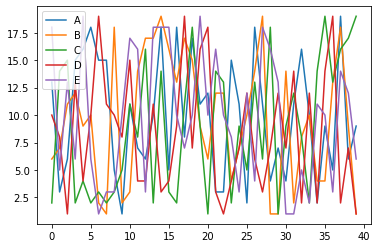

In [140]:
df.plot(kind='line')

<AxesSubplot:>

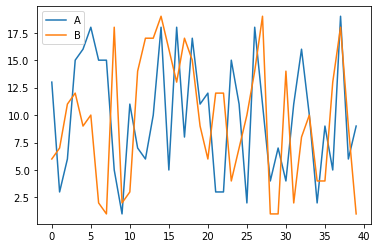

In [141]:
df[['A','B']].plot(kind='line')

In [142]:
# Bar Plot
df.head()

,A,B,C,D,E
0,13,6,2,10,18
1,3,7,14,8,5
2,6,11,15,1,13
3,15,12,2,13,6
4,16,9,4,4,19


<AxesSubplot:>

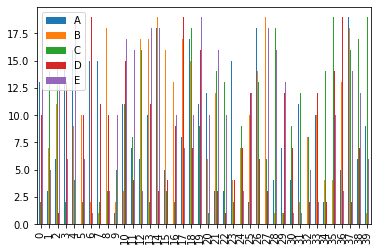

In [143]:
df.plot(kind='bar')

<AxesSubplot:>

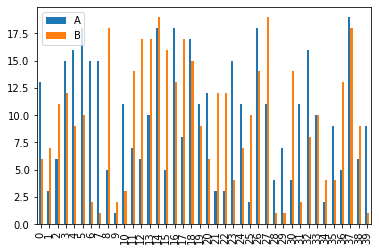

In [144]:
df[['A','B']].plot(kind='bar')

<AxesSubplot:>

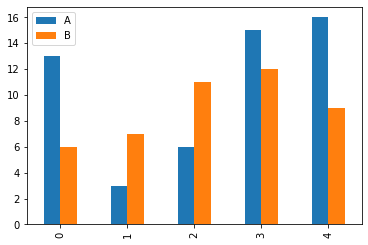

In [145]:
df[['A','B']].head().plot(kind='bar')

<AxesSubplot:>

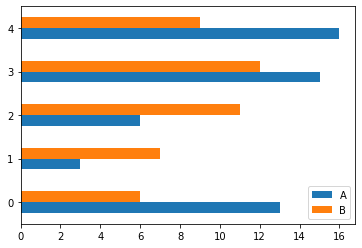

In [146]:
df[['A','B']].head().plot(kind='barh')

In [147]:
# Area Plot
df.head()

,A,B,C,D,E
0,13,6,2,10,18
1,3,7,14,8,5
2,6,11,15,1,13
3,15,12,2,13,6
4,16,9,4,4,19


<AxesSubplot:>

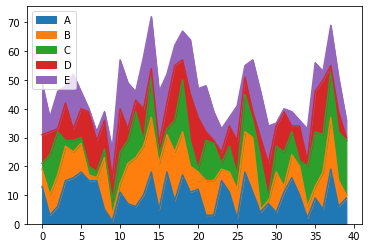

In [148]:
df.plot(kind='area')

<AxesSubplot:>

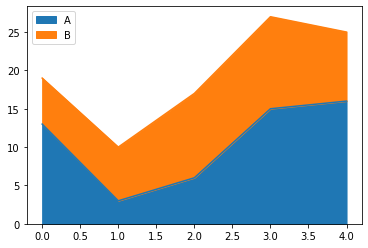

In [149]:
df[['A','B']].head().plot(kind='area')

In [150]:
# Box plot
df.head()

,A,B,C,D,E
0,13,6,2,10,18
1,3,7,14,8,5
2,6,11,15,1,13
3,15,12,2,13,6
4,16,9,4,4,19


<AxesSubplot:>

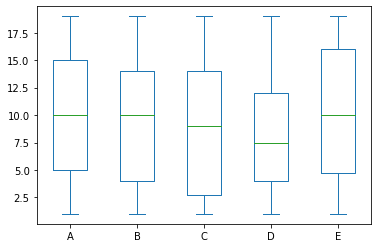

In [151]:
df.plot(kind='box')

In [152]:
# Histogram
df.head()

,A,B,C,D,E
0,13,6,2,10,18
1,3,7,14,8,5
2,6,11,15,1,13
3,15,12,2,13,6
4,16,9,4,4,19


<AxesSubplot:ylabel='Frequency'>

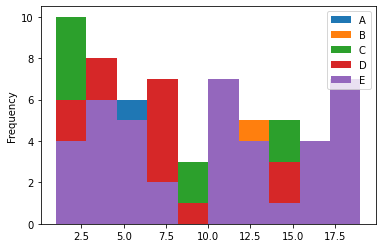

In [153]:
df.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

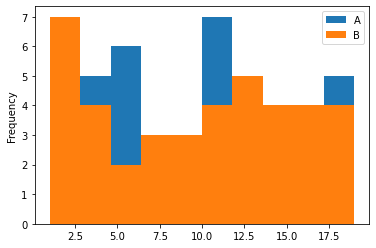

In [154]:
df[['A','B']].plot(kind='hist')

In [155]:
# Kernel Density Estimation (KDE)
df.head()

,A,B,C,D,E
0,13,6,2,10,18
1,3,7,14,8,5
2,6,11,15,1,13
3,15,12,2,13,6
4,16,9,4,4,19


<AxesSubplot:ylabel='Density'>

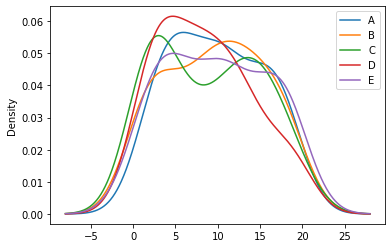

In [156]:
df.plot(kind='kde')

In [157]:
# Scatter plot
df.head()

,A,B,C,D,E
0,13,6,2,10,18
1,3,7,14,8,5
2,6,11,15,1,13
3,15,12,2,13,6
4,16,9,4,4,19


<AxesSubplot:xlabel='A', ylabel='B'>

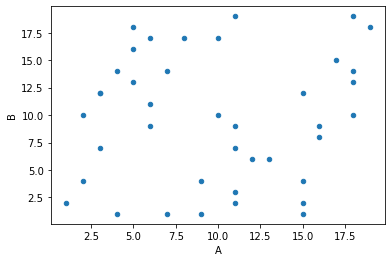

In [158]:
df.plot(x='A', y='B', kind='scatter')

# #33: Menampilkan nilai kumulatif (cummulative)

In [159]:
# Persiapan data frame
d = {'pemain':['Budi','Joni','Iwan','Budi','Budi','Iwan','Asep','Joni'], 'goal':[2,1,3,1,1,2,2,3]}
df = pd.DataFrame(d)
df

,pemain,goal
0,Budi,2
1,Joni,1
2,Iwan,3
3,Budi,1
4,Budi,1
5,Iwan,2
6,Asep,2
7,Joni,3


In [160]:
# Menampilkan nilai kumulatif
df['goal'].cumsum().to_frame()

,goal
0,2
1,3
2,6
3,7
4,8
5,10
6,12
7,15


In [161]:
df['jumlah_goal_kumulatif'] = df['goal'].cumsum()
df

,pemain,goal,jumlah_goal_kumulatif
0,Budi,2,2
1,Joni,1,3
2,Iwan,3,6
3,Budi,1,7
4,Budi,1,8
5,Iwan,2,10
6,Asep,2,12
7,Joni,3,15


In [162]:
df['jumlah_goal_kumulatif_tiap_pemain'] = df.groupby('pemain')['goal'].cumsum() # digunakan untuk menjumlahkan
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain
0,Budi,2,2,2
1,Joni,1,3,1
2,Iwan,3,6,3
3,Budi,1,7,3
4,Budi,1,8,4
5,Iwan,2,10,5
6,Asep,2,12,2
7,Joni,3,15,4


In [163]:
df['cummax'] = df['goal'].cummax() # mendata nilai tertinggi dengan titik tertentu
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain,cummax
0,Budi,2,2,2,2
1,Joni,1,3,1,2
2,Iwan,3,6,3,3
3,Budi,1,7,3,3
4,Budi,1,8,4,3
5,Iwan,2,10,5,3
6,Asep,2,12,2,3
7,Joni,3,15,4,3


In [164]:
df['cummin'] = df['goal'].cummin()
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain,cummax,cummin
0,Budi,2,2,2,2,2
1,Joni,1,3,1,2,1
2,Iwan,3,6,3,3,1
3,Budi,1,7,3,3,1
4,Budi,1,8,4,3,1
5,Iwan,2,10,5,3,1
6,Asep,2,12,2,3,1
7,Joni,3,15,4,3,1


In [165]:
df['cumprod'] = df['goal'].cumprod() # cummulative product = hasil total perkalaian
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain,cummax,cummin,cumprod
0,Budi,2,2,2,2,2,2
1,Joni,1,3,1,2,1,2
2,Iwan,3,6,3,3,1,6
3,Budi,1,7,3,3,1,6
4,Budi,1,8,4,3,1,6
5,Iwan,2,10,5,3,1,12
6,Asep,2,12,2,3,1,24
7,Joni,3,15,4,3,1,72


# #34: Mapping pada data frame dengan applymap()

In [166]:
# Persiapan data frame
df = pd.DataFrame({'jenis_kelamin':['pria','wanita','lelaki','lelaki','perempuan'],'usia':[23,21,24,22,21],'shift':['pagi','siang','malam','siang','pagi']})
df

,jenis_kelamin,usia,shift
0,pria,23,pagi
1,wanita,21,siang
2,lelaki,24,malam
3,lelaki,22,siang
4,perempuan,21,pagi


In [167]:
# Mapping pada data frame dengan applymap()
df = df.applymap(lambda x: x.lower() if type(x) == str else x)  # menyeragamkan tulisan ke lower case semua
df

,jenis_kelamin,usia,shift
0,pria,23,pagi
1,wanita,21,siang
2,lelaki,24,malam
3,lelaki,22,siang
4,perempuan,21,pagi


In [168]:
#applymap() dengan dictionary
Mapping = {'pria' : 'L','lelaki':'L','wanita':'P','perempuan':'P','pagi':1,'siang':2,'malam':3}
df.applymap(Mapping.get)

,jenis_kelamin,usia,shift
0,L,None,1
1,P,None,2
2,L,None,3
3,L,None,2
4,P,None,1


In [169]:
df[['jenis_kelamin','shift']] = df[['jenis_kelamin','shift']].applymap(Mapping.get)
df

,jenis_kelamin,usia,shift
0,L,23,1
1,P,21,2
2,L,24,3
3,L,22,2
4,P,21,1


# #35: Memadukan fungsi agregasi dengan transform()

In [170]:
# Persiapan data frame
d = {'no_nota': [1,1,1,2,2,3,4,5], 
    'kopi':['latte','cappuccino','espresso','latte','espresso','cappuccino','latte','espresso'], 
    'harga':[50,60,80,150,120,60,100,40]}
df = pd.DataFrame(d)
df

,no_nota,kopi,harga
0,1,latte,50
1,1,cappuccino,60
2,1,espresso,80
3,2,latte,150
4,2,espresso,120
5,3,cappuccino,60
6,4,latte,100
7,5,espresso,40


In [171]:
# Menghitung total harga untuk tiap nomor nota
df.groupby('no_nota')['harga'].sum().to_frame()

,harga
no_nota,
1,190
2,270
3,60
4,100
5,40


In [172]:
df['total_harga'] = df.groupby('no_nota')['harga'].transform(sum)
df

,no_nota,kopi,harga,total_harga
0,1,latte,50,190
1,1,cappuccino,60,190
2,1,espresso,80,190
3,2,latte,150,270
4,2,espresso,120,270
5,3,cappuccino,60,60
6,4,latte,100,100
7,5,espresso,40,40


In [173]:
# Menghitung total omset untuk tiap jenis kopi yang terjual
df.groupby('kopi')['harga'].sum().to_frame()

,harga
kopi,
cappuccino,120
espresso,240
latte,300


In [174]:
df['total_omset'] = df.groupby('kopi')['harga'].transform(sum)
df

,no_nota,kopi,harga,total_harga,total_omset
0,1,latte,50,190,300
1,1,cappuccino,60,190,120
2,1,espresso,80,190,240
3,2,latte,150,270,300
4,2,espresso,120,270,240
5,3,cappuccino,60,60,120
6,4,latte,100,100,300
7,5,espresso,40,40,240


# #36: Menyatukan kolom dengan str.cat()

In [175]:
# Persiapan data frame
data = {'nama':['bayu','indra','devi','agni'],
        'jenis_kelamin':['L','L','P','L'],
        'usia':[23,21,22,25]}

df = pd.DataFrame(data)
df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,21
2,devi,P,22
3,agni,L,25


In [176]:
# Menyatukan kolom dengan str.cat()
df['nama'].str.cat(df['jenis_kelamin'],sep=', ').to_frame()

,nama
0,"bayu, L"
1,"indra, L"
2,"devi, P"
3,"agni, L"


In [177]:
df['nama_jk'] = df['nama'].str.cat(df['jenis_kelamin'], sep=', ')
df

,nama,jenis_kelamin,usia,nama_jk
0,bayu,L,23,"bayu, L"
1,indra,L,21,"indra, L"
2,devi,P,22,"devi, P"
3,agni,L,25,"agni, L"


In [178]:
df['nama'].str.cat(df['usia'].astype('str'), sep=' - ').to_frame()

,nama
0,bayu - 23
1,indra - 21
2,devi - 22
3,agni - 25


In [179]:
df['nama_usia'] = df['nama'].str.cat(df['usia'].astype('str'), sep=' - ').to_frame()
df

,nama,jenis_kelamin,usia,nama_jk,nama_usia
0,bayu,L,23,"bayu, L",bayu - 23
1,indra,L,21,"indra, L",indra - 21
2,devi,P,22,"devi, P",devi - 22
3,agni,L,25,"agni, L",agni - 25


# #37: Seleksi baris dengan banyak kriteria

In [180]:
# Persiapan data frame
df = pd.read_csv('./Dataset/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [181]:
# Seleksi baris dengan banyak kriteria
df[(df['sex']=='female') & (df['age']>=60) & (df['embarked']=='S') & (df['survived']==1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


In [182]:
# membuat kode readble sehingga mudah di baca
df[
    (df['sex']=='female') &
    (df['age']>=60) &
    (df['embarked']=='S') &
    (df['survived']==1)
]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


In [184]:
# alternatif lain dengan memasukan kritera ke dalam variabel tersendiri
kr1 = df['sex']=='female'
kr2 = df['age']>=60
kr3 = df['embarked']=='S'
kr4 = df['survived']==1

df[kr1 & kr2 & kr3 & kr4]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


# #38: Mengenal parameter header dan skiprows

In [189]:
# Persiapan data frame
df = pd.read_csv('./Dataset/Iris_error.csv')
df.head(8)

,1,5.1,3.5,1.4,0.2,Iris-error
0,2,4.9,3,1.4,0.2,Iris-setosa
1,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,1,5.1,3.5,1.4,0.2,Iris-setosa
3,2,4.9,3,1.4,0.2,Iris-setosa
4,3,4.7,3.2,1.3,0.2,Iris-error
5,4,4.6,3.1,1.5,0.2,Iris-error
6,5,5,3.6,1.4,0.2,Iris-setosa
7,6,5.4,3.9,1.7,0.4,Iris-setosa


In [191]:
df = pd.read_csv('./Dataset/Iris_error.csv', header=2, skiprows=[5,6])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,5,5.0,3.6,1.4,0.2,Iris-setosa
3,6,5.4,3.9,1.7,0.4,Iris-setosa
4,7,4.6,3.4,1.4,0.3,Iris-setosa


# #39: Mengacak urutan baris pada data frame

In [192]:
# Persiapan data frame
n_rows = 6
n_cols = 5
cols=tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,5,size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,3,1,4,1,4
1,4,2,2,1,3
2,4,4,1,3,2
3,2,3,4,4,2
4,3,2,4,3,2
5,2,3,1,2,3


In [193]:
# Mengacak urutan baris pada data frame
df.sample(frac=1.0, random_state=1) #index akan mengadopsi pada nilai awal / ikut teracak

,A,B,C,D,E
2,4,4,1,3,2
1,4,2,2,1,3
4,3,2,4,3,2
0,3,1,4,1,4
3,2,3,4,4,2
5,2,3,1,2,3


In [194]:
df.sample(frac=1.0, random_state=1).reset_index(drop=True) # index akan mereset sehingga membenutk index urut baru

,A,B,C,D,E
0,4,4,1,3,2
1,4,2,2,1,3
2,3,2,4,3,2
3,3,1,4,1,4
4,2,3,4,4,2
5,2,3,1,2,3


# #40: Mengakses sekelompok data dengan get_group()

In [195]:
df = pd.read_csv('./Dataset/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [198]:
# Mengakses sekelompok data yang sudah terkelompok dengan get_group()
grouped_df = df.groupby('sex')

In [202]:
grouped_df.get_group('female').head(10) # Menampilkan sex female only

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C


In [203]:
grouped_df = df.groupby('survived')

In [204]:
grouped_df.get_group(1).head(10) # Menampilkan survival yang selamat saja

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.00,0,0,PC 17477,69.3000,B35,C
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.00,0,0,19877,78.8500,NaN,S
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C


# #41: Menerapkan agregasi pada sejumlah kolom dengan agg()

In [205]:
# Persiapan data frame
df = pd.read_csv('./Dataset/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [206]:
# Menerapkan agregasi pada sejumlah kolom dengan agg()
df.groupby('pclass').agg({'pclass':'count',
                          'age':['mean','max'],
                          'survived':'mean'})

pclass        age        survived
        count       mean   max      mean
pclass                                  
1         323  39.159930  80.0  0.619195
2         277  29.506705  70.0  0.429603
3         709  24.816367  74.0  0.255289

In [209]:
# Merubah nama kolom / memberikan kolom name baru
df.groupby('pclass').agg(n_pass=('pclass','count'),
                          avg_age=('age','mean'),
                          max_age=('age','max'),
                          survival_rate=('survived','mean'))

,n_pass,avg_age,max_age,survival_rate
pclass,,,,
1,323,39.159930,80.0,0.619195
2,277,29.506705,70.0,0.429603
3,709,24.816367,74.0,0.255289


# #42: Mengurutkan data berdsarkan kolom tertentu